In [1]:
import MDAnalysis as mda #import MDAnalysis
from MDAnalysis.analysis import contacts #allows us to use contacts_within_cutoff

import os #allows us to move directories, needed for looping directories
import numpy as np #scientific computing package, for making arrays
import pandas as pd #data analysis module, for making data frames
import matplotlib.pyplot as plt #plotting module
import seaborn as sns
from math import *
##renders figures in a notebook
%matplotlib inline 

In [2]:
plt.rcParams['figure.dpi'] = 100 #lower  quality inline figure
plt.rcParams['savefig.dpi'] = 600 #high quality save file for publication

In [3]:
rad = 4.5 #the distance within two atoms are considered to be bonded
## Azimuthal angles around the z-axis, for a total of 14 segments
## Azimuthal angles around the z-axis, for a total of 14 segments
thetas = ['018', '054', '090', '126', '162', '198', '234', '270', '306', '342',]
dcd_thetas = ['18', '54', '90', '126', '162', '198', '234', '270', '306', '342',]
# z values at the center of each patch, from z = -22 to z = 27 Angstrom
zz = ['-23.80', '-17.00', '-10.20', '-3.40', '03.40', '10.20', '17.00', '23.80',]
#combined z and theta values
z_theta = []
z = []
theta = []
#creating a list of all simulations and their bonds
bcolumns = ['z','theta', 'Bonds']
sb_z_theta = pd.DataFrame(columns= bcolumns)

In [4]:
#script from MDAnalysis contacts that allows us to find contacts within the cutoff 
def contacts_within_cutoff(u, sug_pi, pro_pi, radius=rad):
	timeseries = []
	for ts in u.trajectory:
		dist = contacts.distance_array(sug_pi.positions, pro_pi.positions)
		n_contacts = contacts.contact_matrix(dist, radius).sum()
		timeseries.append([ts.frame, n_contacts])
	return np.array(timeseries)

In [5]:
for i in range(len(zz)):
	for j in range(len(thetas)):
		## First, theta
		theta = thetas[j]
		dcd_theta = dcd_thetas[j]
		## Then z
		z = zz[i]
		#defines theta and phi to one decimal point
		# theta = "%.2f" % theta
		# z = "%.2f" % z
		#adding theta and phi to the empty theta_phi list
		z_theta.append("z = " + z + " , θ = " + theta + "°")

		#defining file locations for PSF and DCD
		PSF_loc = "configurations/" + z + "_" + theta + "/4XCZ__T3Q_" + z + "_" + theta + "__solvated_ionized.psf"
		DCD_loc = "configurations/" + z + "_" + theta + "/o/4XCZ__T3Q_" + z + "_" + dcd_theta + ".dcd"
		print (DCD_loc)
		#start of the MDA script
		##define a string beforehand for the filename
		##change vscode to wrap lines
		u = mda.Universe(PSF_loc,DCD_loc)
		
		# sel_ppi = "resname TRP or resname TYR"
		sel_ppi = "resname TRP or resname PHE or resname TYR" #all aromatic res
		# sel_spi = "index 2123 or index 2126 or index 2129" #for pentose
		# sel_spi = "index 2133 or index 2137 or index 2141" #for Qui-3N
		# sel_spi = "index 2123 or index 2126 or index 2129 or index 2133 or index 2137 or index 2141" #for Qui-3N and pentose
		# sel_spi = "index 2086 or index 2092 or index 2085 or index 2087 or index 2089 or index 2091" #for TDP
		sel_spi = "index 2086 or index 2092 or index 2085 or index 2087 or index 2089 or index 2091 or index 2123 or index 2126 or index 2129 or index 2133 or index 2137 or index 2141" #for all
		# sel_spi = "index 2086 and index 2092 and index 2085 and index 2087 and index 2089 and index 2091 or index 2123 and index 2126 and index 2129 or index 2133 and index 2137 and index 2141" #for all, rings

		sug_pi = u.select_atoms(sel_spi) 
		pro_pi = u.select_atoms(sel_ppi) 
			
		ca = contacts_within_cutoff(u, sug_pi, pro_pi, radius=rad)
		ca.shape
		ca_df = pd.DataFrame(ca, columns=['Frame', '# Contacts'])
		# print dataframe
		# display(ca_df)
		
		#calculate and store the total number of bonds in the simulation
		total_sb = ca_df['# Contacts'].sum()
		# print(total_sb)

		#add the total number of bonds in an array
		#adds the theta and z values to the hbond table
		sb_z_theta = sb_z_theta.append([{'z':z, 'theta': theta, 'Bonds': total_sb}], ignore_index=True)

		#store data frame as a text file
		sb_array = ca_df.to_numpy()
		np.savetxt("configurations/" + z + "_" + theta + "/pi_MDA.txt", sb_array, fmt = "%d")

		# ca_df.head()
		# ca_df.plot(x='Frame')

		# plt.savefig("configurations/figures/" + z + "_" + theta + ".png")
		# plt.ylabel('# Contacts')

		#check total number of bonds per simulation, only uncomment when troubleshooting, slows down code
		# print(sb_z_theta)

configurations/-23.80_018/o/4XCZ__T3Q_-23.80_18.dcd
configurations/-23.80_054/o/4XCZ__T3Q_-23.80_54.dcd
configurations/-23.80_090/o/4XCZ__T3Q_-23.80_90.dcd
configurations/-23.80_126/o/4XCZ__T3Q_-23.80_126.dcd
configurations/-23.80_162/o/4XCZ__T3Q_-23.80_162.dcd
configurations/-23.80_198/o/4XCZ__T3Q_-23.80_198.dcd
configurations/-23.80_234/o/4XCZ__T3Q_-23.80_234.dcd
configurations/-23.80_270/o/4XCZ__T3Q_-23.80_270.dcd
configurations/-23.80_306/o/4XCZ__T3Q_-23.80_306.dcd
configurations/-23.80_342/o/4XCZ__T3Q_-23.80_342.dcd
configurations/-17.00_018/o/4XCZ__T3Q_-17.00_18.dcd
configurations/-17.00_054/o/4XCZ__T3Q_-17.00_54.dcd
configurations/-17.00_090/o/4XCZ__T3Q_-17.00_90.dcd
configurations/-17.00_126/o/4XCZ__T3Q_-17.00_126.dcd
configurations/-17.00_162/o/4XCZ__T3Q_-17.00_162.dcd
configurations/-17.00_198/o/4XCZ__T3Q_-17.00_198.dcd
configurations/-17.00_234/o/4XCZ__T3Q_-17.00_234.dcd
configurations/-17.00_270/o/4XCZ__T3Q_-17.00_270.dcd
configurations/-17.00_306/o/4XCZ__T3Q_-17.00_306.dcd

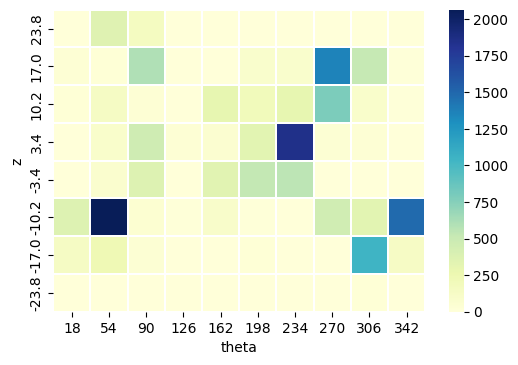

In [6]:
sb_z_theta.to_csv('00_ankyrin_pi_all_4.5_TRP_TYR_PHE_all.csv')
sb = pd.read_csv('00_ankyrin_pi_all_4.5_TRP_TYR_PHE_all.csv')

#load csv file
df_wide = sb.pivot_table( index='z', columns='theta', values='Bonds')

hm = sns.heatmap(df_wide, cmap="YlGnBu", linewidths=.003)
hm.invert_yaxis()
hm_fig = hm.get_figure() #this line may be an issue for the cluster, since there are no graphics
hm_fig.savefig("configurations/ankyrin_pi_hm_4.5_TRP_TYR_PHE_all.png")